**Introduction - Energy Consumption Analysis**

Understanding energy consumption is important in a variety of applications.

For example, this data is essential in the roll out of renewable energy sources and determining feasibility.

For this study, the data will be applied to develop or modify utility price plans based on energy demands and possible changes year over year.

The study will focus on comparing energy consumption in 2018 and 2019 and determining if any significant differences occur in either Houston or Dallas.  

**Hypothesis**

Ho: There is no significant difference between the energy consumed in 2018 and the energy consumed in 2019. (Applicable to both cities in study)

Ha: There is a significant difference between the energy consumed in 2018 and the energy consumed in 2019. (Applicable to both cities in study)

**Data**

The data can be found on [kaggle](https://www.kaggle.com/shubhamkulkarni01/us-top-10-cities-electricity-and-weather-data/download). There is data provided on a time based period between 1/1/2018 01:00 and 4/30/2020 00:00. The consumed MW of electricity is reported for San Antonio, Houston, and Dallas. No data points are missing. Original data source is the EIA.

In [1]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Bring in CSV to DataFrame
energy_eia=pd.read_csv('https://raw.githubusercontent.com/fdortega/pythonobjects/master/datasets_667967_1234527_cleaned_texas_data%20(1).csv')

# Adjust for time stamp - only interested in YYYY
energy_eia['date'] = pd.DatetimeIndex(energy_eia['date']).year

# Basic data for all values in dataset
energy_eia.info()
energy_eia.head(-5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20423 entries, 0 to 20422
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         20423 non-null  int64  
 1   houston      20423 non-null  float64
 2   san antonio  20423 non-null  float64
 3   dallas       20423 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 638.3 KB


,date,houston,san antonio,dallas
0,2018,11425.98,9151.19,18584.34
1,2018,11408.42,9144.99,18524.14
2,2018,11405.20,9141.04,18532.06
3,2018,11450.56,9157.96,18647.44
4,2018,11631.34,9214.33,19002.10
...,...,...,...,...
20413,2020,12742.43,7109.33,12840.05
20414,2020,13224.49,7570.69,13458.87
20415,2020,13588.39,7978.48,14054.53
20416,2020,13699.67,8270.54,14402.40


**Methods**

For this study, the data will be broken down into individual cities and corresponding years. Each set of data will be inspected for normality before tests are administered to determine whether differences exist year over year.

In [2]:
# Separate the data into two tables, 2018 and 2019
energy_18=energy_eia[energy_eia['date'] == 2018]
energy_19=energy_eia[energy_eia['date'] == 2019]

In [3]:
# Records count per city
print(energy_18.groupby(['date']).agg(['count']))
print(energy_19.groupby(['date']).agg(['count']))

# Separate data into cities and years
# Houston
hou18 = energy_18['houston']
hou19 = energy_19['houston']

# Dallas
dallas18 = energy_18['dallas']
dallas19 = energy_19['dallas']

     houston san antonio dallas
       count       count  count
date                           
2018    8760        8760   8760
     houston san antonio dallas
       count       count  count
date                           
2019    8760        8760   8760


DescribeResult(nobs=8760, minmax=(7897.15, 20269.85), mean=12164.573954337899, variance=7279762.269230941, skewness=0.8398603245266684, kurtosis=-0.0734641785642407)
DescribeResult(nobs=8760, minmax=(7913.34, 21256.12), mean=12354.094915525115, variance=7885394.097264819, skewness=0.8680269907916967, kurtosis=-0.0829589362145029)


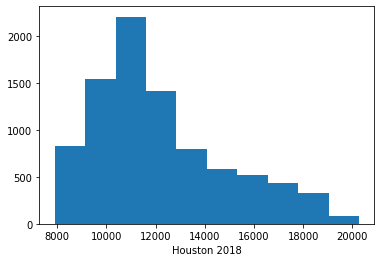

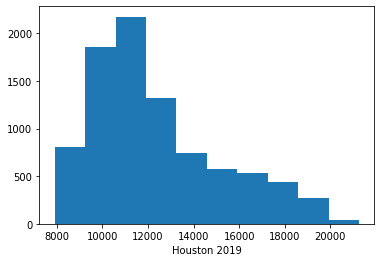

In [4]:
# Visual and desctiptive statistics to test for normality - Houston
print(stats.describe(hou18))
print(stats.describe(hou19))

# Histograms
plt.hist(hou18)
plt.xlabel('Houston 2018')
plt.show()
plt.hist(hou19)
plt.xlabel('Houston 2019')
plt.show()

DescribeResult(nobs=8760, minmax=(7845.78, 26499.24), mean=13871.593384703197, variance=13983967.224095508, skewness=0.883126113068552, kurtosis=0.14805202487954894)
DescribeResult(nobs=8760, minmax=(7851.37, 25493.79), mean=13819.153724885844, variance=12902955.615172047, skewness=0.897495904015079, kurtosis=0.26148311976674554)


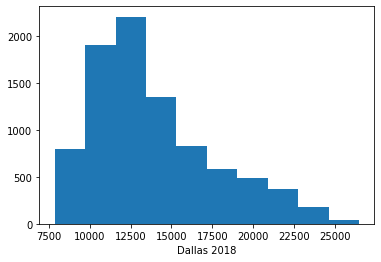

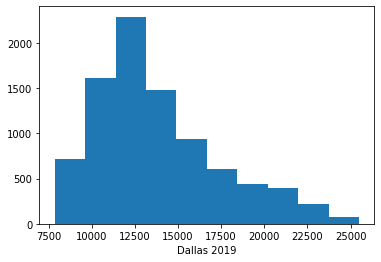

In [5]:
# Visual and desctiptive statistics to test for normality - Dallas
print(stats.describe(dallas18))
print(stats.describe(dallas19))

# Histograms
plt.hist(dallas18)
plt.xlabel('Dallas 2018')
plt.show()
plt.hist(dallas19)
plt.xlabel('Dallas 2019')
plt.show()

Based on kurtosis and **skew**, the data is **NOT** **normal**. All the plots are positively skewed. Sample size is greater than 5,000 therefore will not apply Shapiro Wilks test.

Will use QQ plot for further inspection of data normality.

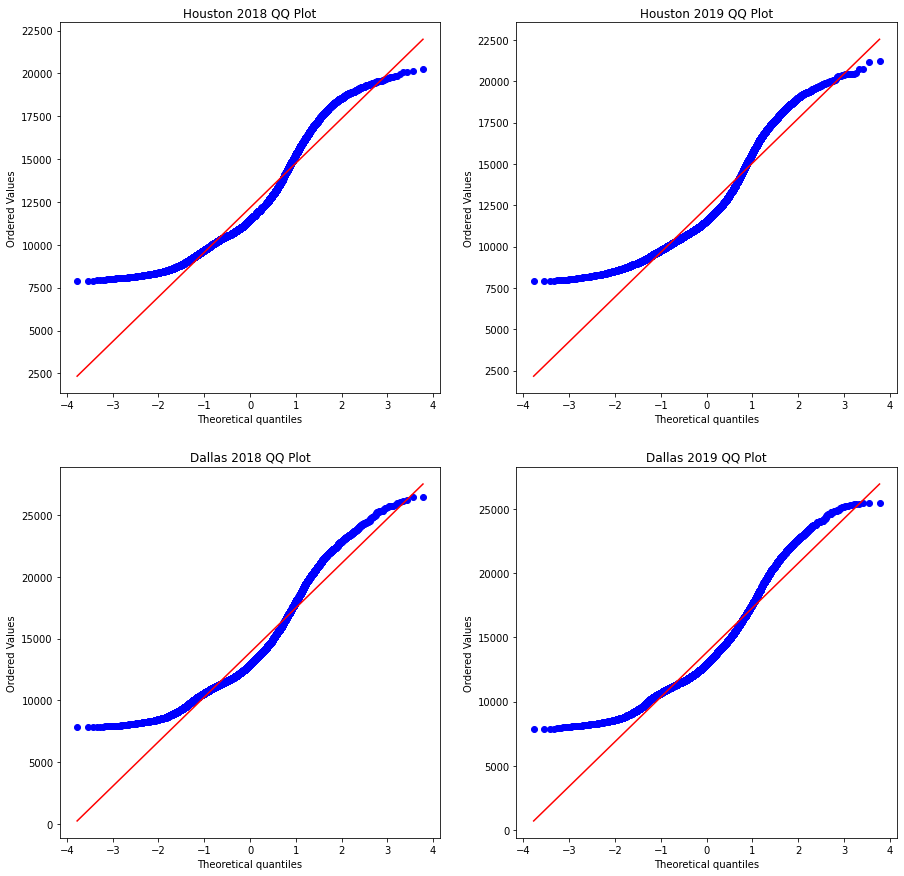

In [8]:
# Normality testing - QQ Plots for each of the four data sets
import numpy as np 
import pylab 
import scipy.stats as stats

# Create plot matrix
plt.figure(figsize = (15, 15))

plt.subplot(2,2,1)
stats.probplot(hou18, dist="norm", plot=pylab)
plt.title('Houston 2018 QQ Plot')

plt.subplot(2,2,2)
stats.probplot(hou19, dist="norm", plot=pylab)
plt.title('Houston 2019 QQ Plot')

plt.subplot(2,2,3)
stats.probplot(dallas18, dist="norm", plot=pylab)
plt.title('Dallas 2018 QQ Plot')

plt.subplot(2,2,4)
stats.probplot(dallas19, dist="norm", plot=pylab)
plt.title('Dallas 2019 QQ Plot')
pylab.show()

The QQ plots re-affirm the non-normality of the data.

A Kruskal Wallis test will be administered to determine if 2018 and 2019 energy consumptions differ significantly in either Houston or Dallas.

In [9]:
# Kruskal Wallis Test for Houston
stats.kruskal(hou18, hou19)

KruskalResult(statistic=15.362256122232075, pvalue=8.874338769251859e-05)

In [10]:
# Kruskal Wallis Test for Dallas
stats.kruskal(dallas18, dallas19)

KruskalResult(statistic=0.01481090407728746, pvalue=0.903136567432575)

Text(0.5, 1.0, 'Houston')

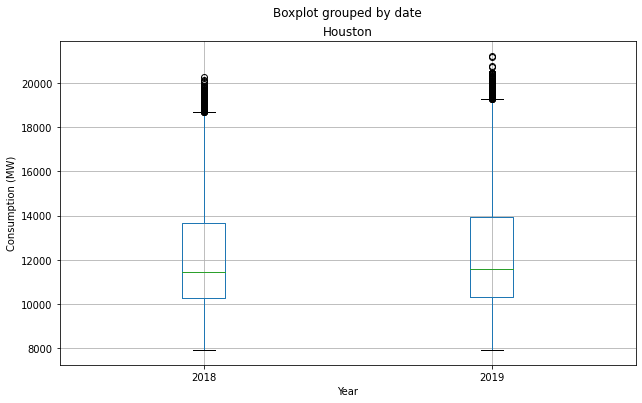

In [11]:
# Create boxplots to visualize the difference in Houston
energy_eia1819 = energy_eia[energy_eia['date'] != 2020]
energy_eia1819.boxplot('houston', by='date', figsize = (10,6))
plt.xlabel('Year')
plt.ylabel('Consumption (MW)')
plt.title('Houston')


In [13]:
# Descriptive statistics comparison
print(hou18.describe(),'\n')

print(hou19.describe())

count     8760.000000
mean     12164.573954
std       2698.103458
min       7897.150000
25%      10266.235000
50%      11456.740000
75%      13638.732500
max      20269.850000
Name: houston, dtype: float64 

count     8760.000000
mean     12354.094916
std       2808.094389
min       7913.340000
25%      10321.590000
50%      11554.270000
75%      13911.920000
max      21256.120000
Name: houston, dtype: float64


Text(0.5, 1.0, 'Dallas')

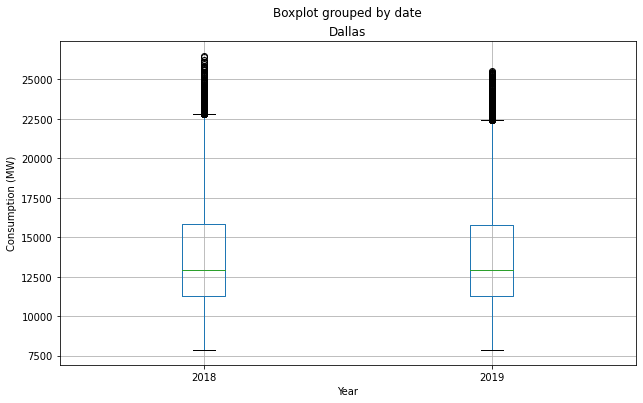

In [ ]:
# Create a boxplot for Dallas
energy_eia1819.boxplot('dallas', by='date', figsize = (10,6))
plt.xlabel('Year')
plt.ylabel('Consumption (MW)')
plt.title('Dallas')

In [14]:
# Descriptive statistics comparison
print(dallas18.describe(),'\n')

print(dallas19.describe())

count     8760.000000
mean     13871.593385
std       3739.514303
min       7845.780000
25%      11245.130000
50%      12909.230000
75%      15855.532500
max      26499.240000
Name: dallas, dtype: float64 

count     8760.000000
mean     13819.153725
std       3592.068431
min       7851.370000
25%      11294.870000
50%      12902.000000
75%      15739.897500
max      25493.790000
Name: dallas, dtype: float64


**Results**

Visual tests indicate the data to not be normally distributed. In the case for Houston, the p-value is less than 0.0001. The null is rejected and there is a significant difference in Houston energy consumption when comparing 2018 to 2019.

In the case for Dallas, the p-value is greater than alpha. The null is not rejected. There is no siginificant difference in energy consumption between 2018 and 2019.